In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

Company = ["TSLA", "IBM", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "0700.HK", "BIDU"]

data = yf.download(Company, period="10y")['Close']

data.dropna(inplace=True)

data = data.reset_index()

data['Date'] = pd.to_datetime(data['Date'])

print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed

Ticker       Date     0700.HK       AMZN        BIDU      GOOGL         IBM  \
0      2015-04-27  144.003448  21.927999  220.460007  28.171314  106.080566   
1      2015-04-28  144.889099  21.465500  219.190002  28.084230  108.062630   
2      2015-04-29  145.420456  21.468500  219.000000  27.935940  108.360886   
3      2015-04-30  142.497864  21.089001  200.279999  27.307941  106.428490   
4      2015-05-04  139.929520  21.152000  203.699997  27.510475  108.093666   

Ticker       META       MSFT      NVDA       TSLA  
0       81.525764  41.453407  0.534828  15.436667  
1       80.301537  42.428684  0.537478  15.365333  
2       80.092522  42.342384  0.533383  15.496667  
3       78.400497  41.979889  0.534828  15.070000  
4       78.440315  41.634663  0.544706  15.367333  


In [ ]:
data

Ticker,Date,0700.HK,AMZN,BIDU,GOOGL,IBM,META,MSFT,NVDA,TSLA
0,2015-04-27,144.003448,21.927999,220.460007,28.171314,106.080566,81.525764,41.453407,0.534828,15.436667
1,2015-04-28,144.889099,21.465500,219.190002,28.084230,108.062630,80.301537,42.428684,0.537478,15.365333
2,2015-04-29,145.420456,21.468500,219.000000,27.935940,108.360886,80.092522,42.342384,0.533383,15.496667
3,2015-04-30,142.497864,21.089001,200.279999,27.307941,106.428490,78.400497,41.979889,0.534828,15.070000
4,2015-05-04,139.929520,21.152000,203.699997,27.510475,108.093666,78.440315,41.634663,0.544706,15.367333
...,...,...,...,...,...,...,...,...,...,...
2395,2025-04-17,458.000000,172.610001,82.589996,151.160004,238.809998,501.480011,367.779999,101.489998,241.369995
2396,2025-04-22,460.399994,173.179993,85.059998,151.470001,240.899994,500.279999,366.820007,98.889999,237.970001
2397,2025-04-23,474.200012,180.600006,87.510002,155.350006,245.479996,520.270020,374.390015,102.709999,250.740005
2398,2025-04-24,471.000000,186.539993,89.500000,159.279999,229.330002,533.150024,387.299988,106.430000,259.510010


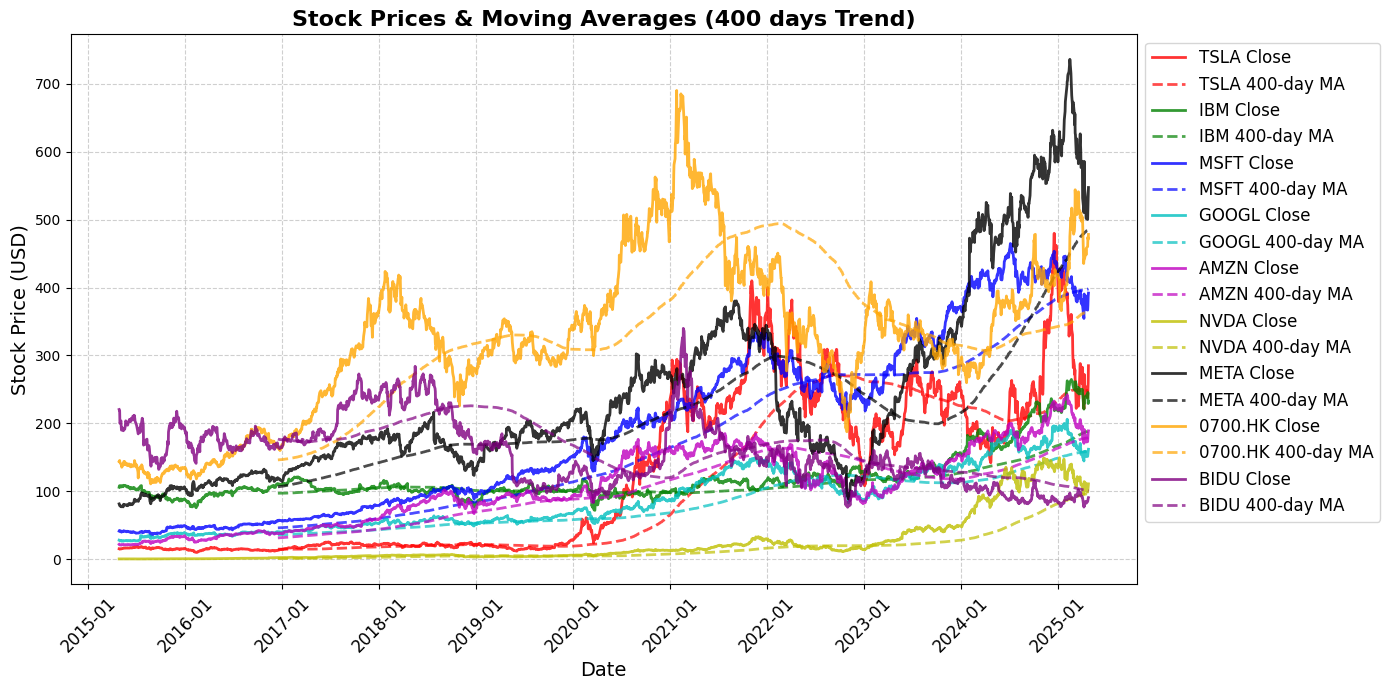

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

plt.figure(figsize=(14, 7))

for i, company in enumerate(Company):
    if company in data.columns:
        plt.plot(data['Date'], data[company], color=colors[i % len(colors)], linewidth=2, alpha=0.8, label=f"{company} Close")
        plt.plot(data['Date'], data[company].rolling(400).mean(),
                 color=colors[i % len(colors)], linestyle='dashed', linewidth=2, alpha=0.7,
                 label=f"{company} 400-day MA")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=12)

plt.title("Stock Prices & Moving Averages (400 days Trend)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


[*********************100%***********************]  9 of 9 completed


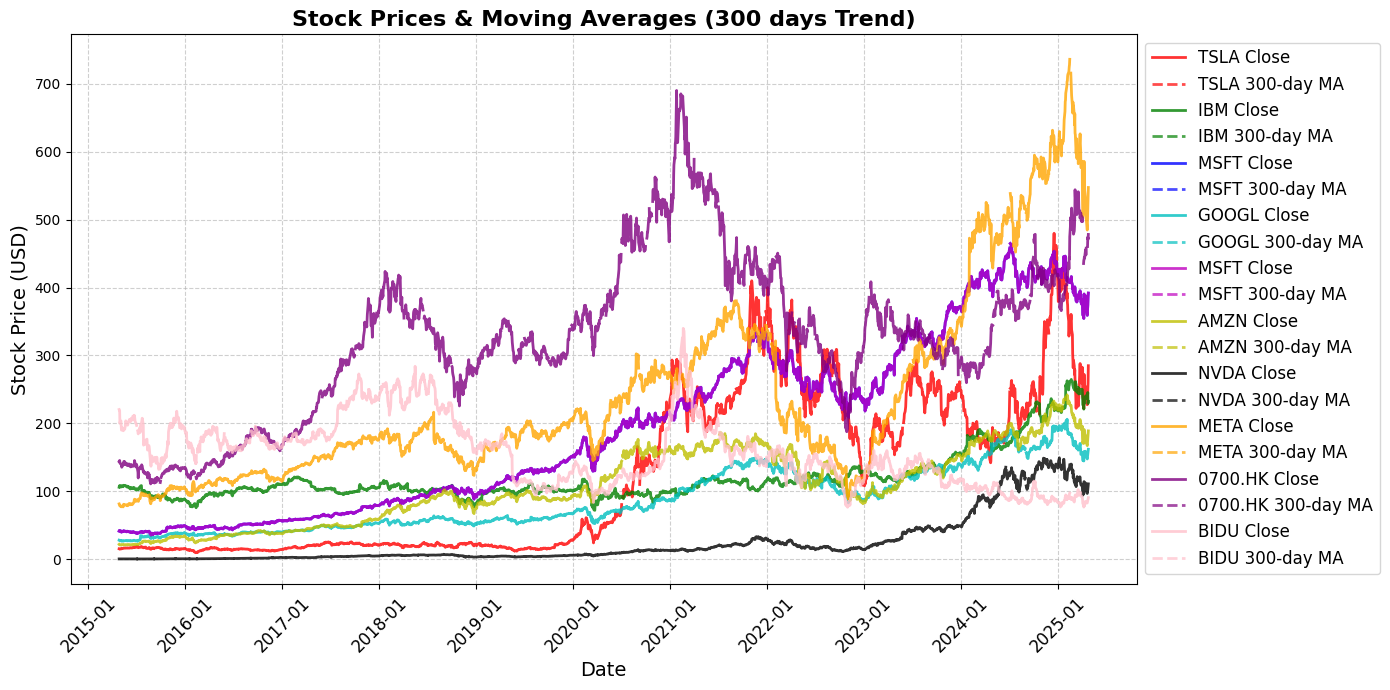

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

Company = ["TSLA", "IBM", "MSFT", "GOOGL", "MSFT", "AMZN", "NVDA", "META", "0700.HK", "BIDU"]

data = yf.download(Company, period="10y")

data.reset_index(inplace=True)

data['Date'] = pd.to_datetime(data['Date'])

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

plt.figure(figsize=(14, 7))

for i, company in enumerate(Company):
    if ('Close', company) in data.columns:
        plt.plot(data['Date'], data[('Close', company)], color=colors[i % len(colors)], linewidth=2, alpha=0.8, label=f"{company} Close")
        plt.plot(data['Date'], data[('Close', company)].rolling(300).mean(),
                 color=colors[i % len(colors)], linestyle='dashed', linewidth=2, alpha=0.7,
                 label=f"{company} 300-day MA")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=12)

plt.title("Stock Prices & Moving Averages (300 days Trend)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


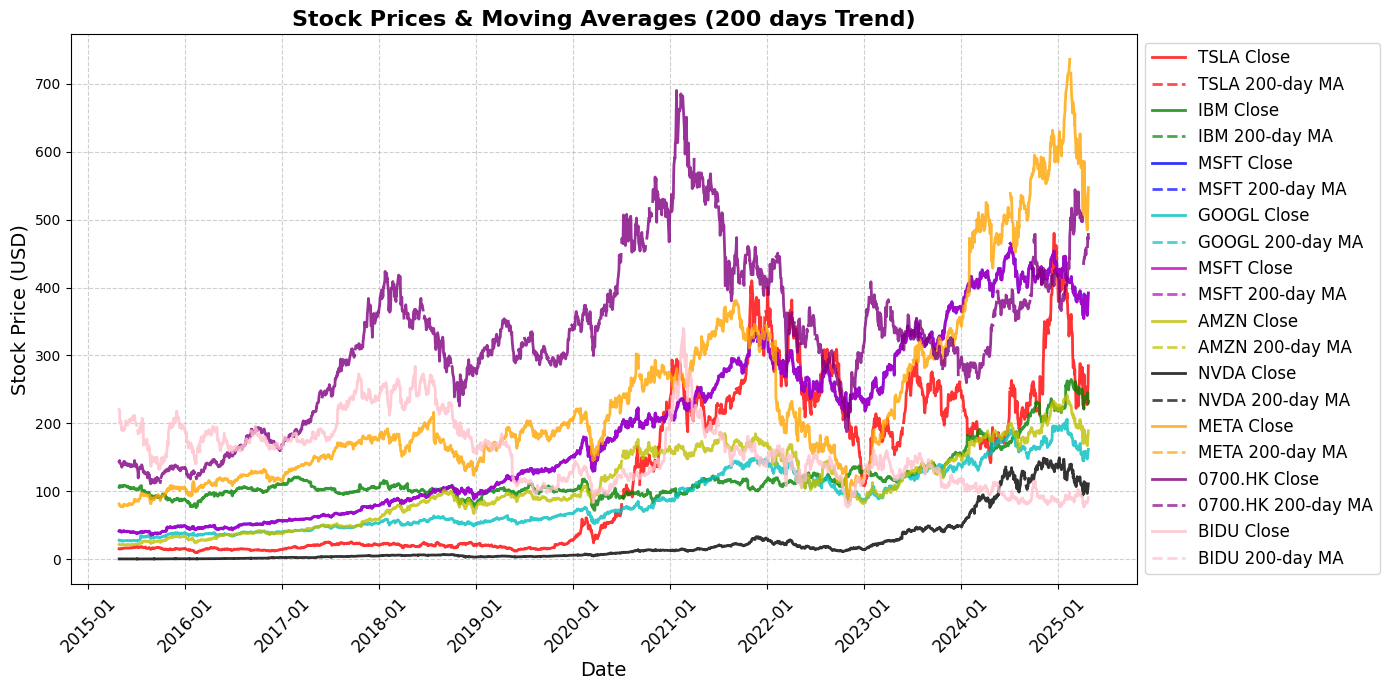

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

plt.figure(figsize=(14, 7))

for i, company in enumerate(Company):
    if ('Close', company) in data.columns:
        plt.plot(data['Date'], data[('Close', company)], color=colors[i % len(colors)], linewidth=2, alpha=0.8, label=f"{company} Close")
        plt.plot(data['Date'], data[('Close', company)].rolling(200).mean(),
                 color=colors[i % len(colors)], linestyle='dashed', linewidth=2, alpha=0.7,
                 label=f"{company} 200-day MA")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=12)

plt.title("Stock Prices & Moving Averages (200 days Trend)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


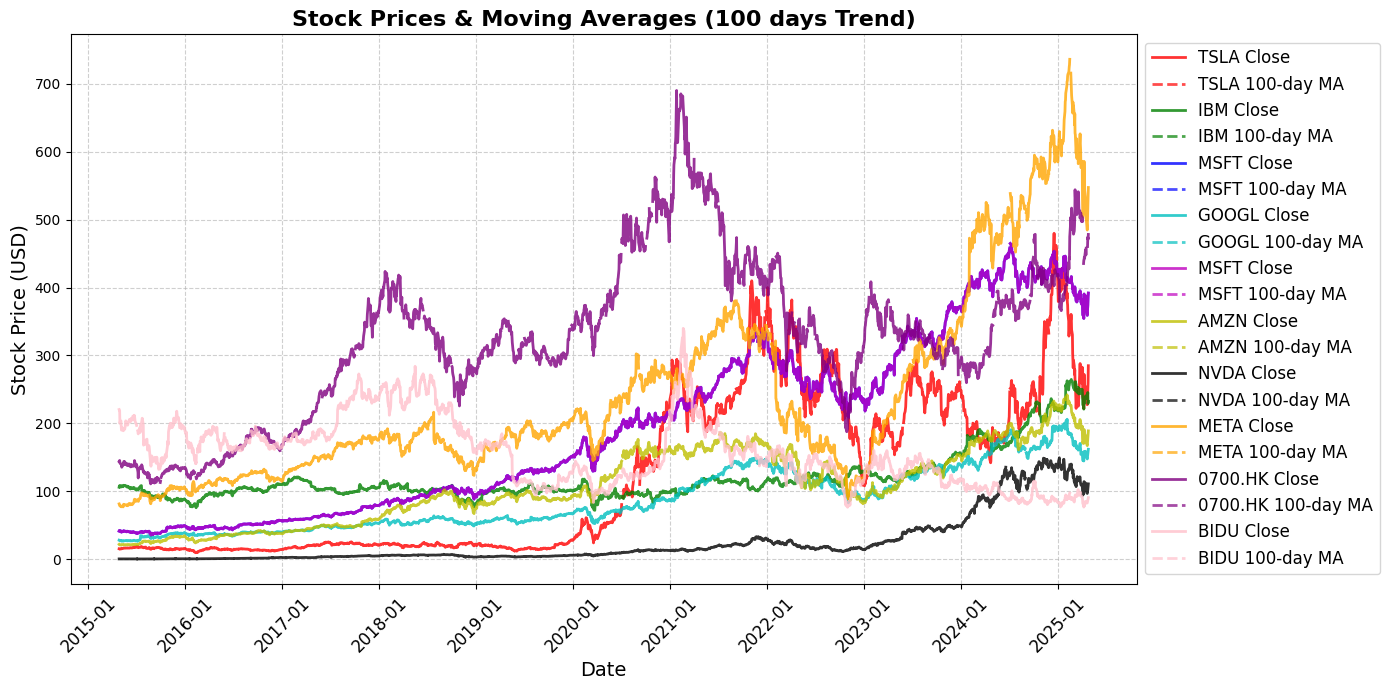

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

plt.figure(figsize=(14, 7))

for i, company in enumerate(Company):
    if ('Close', company) in data.columns:
        plt.plot(data['Date'], data[('Close', company)], color=colors[i % len(colors)], linewidth=2, alpha=0.8, label=f"{company} Close")
        plt.plot(data['Date'], data[('Close', company)].rolling(100).mean(),
                 color=colors[i % len(colors)], linestyle='dashed', linewidth=2, alpha=0.7,
                 label=f"{company} 100-day MA")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=12)

plt.title("Stock Prices & Moving Averages (100 days Trend)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


[*********************100%***********************]  9 of 9 completed


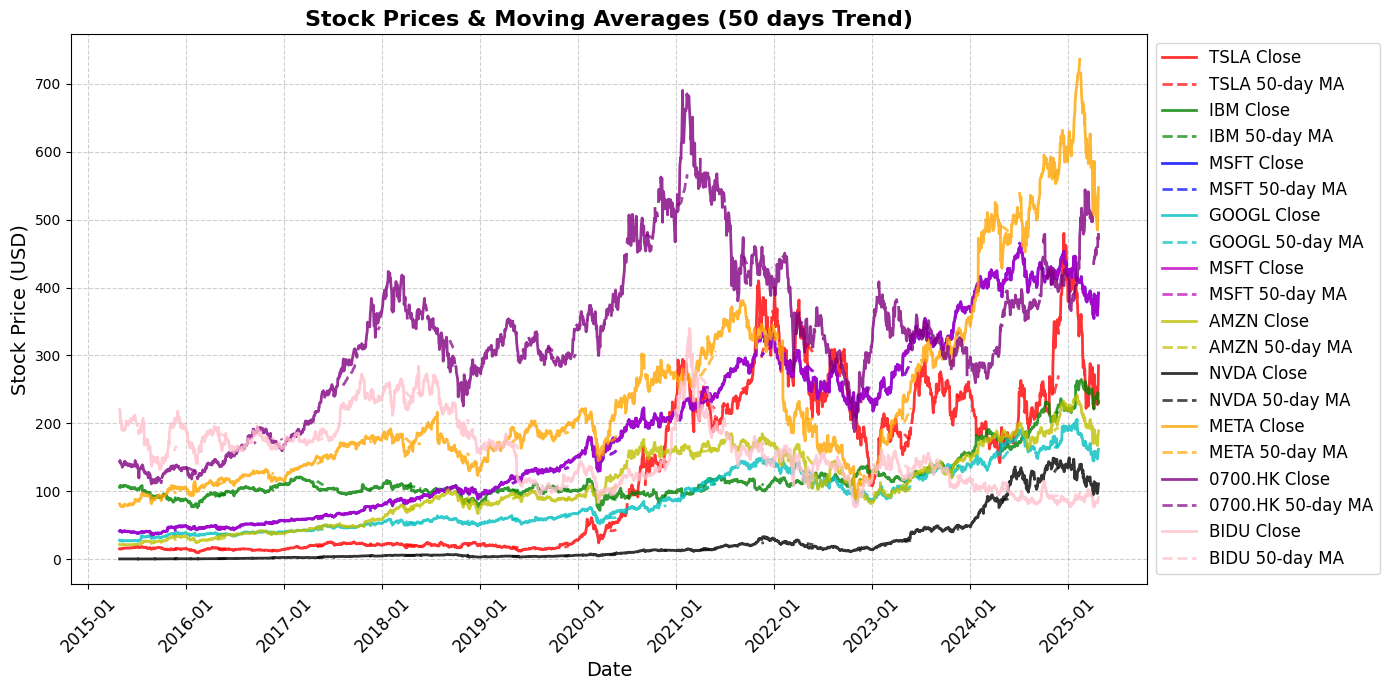

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

Company = ["TSLA", "IBM", "MSFT", "GOOGL", "MSFT", "AMZN", "NVDA", "META", "0700.HK", "BIDU"]

data = yf.download(Company, period="10y")

data.reset_index(inplace=True)

data['Date'] = pd.to_datetime(data['Date'])

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

plt.figure(figsize=(14, 7))

for i, company in enumerate(Company):
    if ('Close', company) in data.columns:
        plt.plot(data['Date'], data[('Close', company)], color=colors[i % len(colors)], linewidth=2, alpha=0.8, label=f"{company} Close")
        plt.plot(data['Date'], data[('Close', company)].rolling(50).mean(),
                 color=colors[i % len(colors)], linestyle='dashed', linewidth=2, alpha=0.7,
                 label=f"{company} 50-day MA")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=12)

plt.title("Stock Prices & Moving Averages (50 days Trend)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data.dropna(inplace=True)
data_train = pd.DataFrame(data['Close'][0: int(len(data) * 0.90)])
data_test = pd.DataFrame(data['Close'][int(len(data) * 0.90):])

print("Training Data Size:", data_train.shape[0])
print("Testing Data Size:", data_test.shape[0])

scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler.fit_transform(data_train)

x, y = [], []
for i in range(200, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)


Training Data Size: 2160
Testing Data Size: 240


In [ ]:
# ---------- Model Building ----------
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(200, 9)))
model.add(LSTM(units=100, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=110, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=90, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=200, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 438ms/step - loss: 0.2072
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 416ms/step - loss: 0.0718
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 415ms/step - loss: 0.0508
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - loss: 0.0415
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - loss: 0.0406
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - loss: 0.0381
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 414ms/step - loss: 0.0412
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - loss: 0.0372
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 416ms/step - loss: 0.0357
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - loss: 0.0377
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 419ms/step - loss: 0.0389
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 414ms/step - loss: 0.0362
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - loss: 0.0374
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 433ms/step - loss: 0.0349
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.01, max_depth=6, subsample=0.8)

xgb_model.fit(x.reshape(x.shape[0], x.shape[1] * x.shape[2]), y)

y_pred = xgb_model.predict(x.reshape(x.shape[0], x.shape[1] * x.shape[2]))

mse = mean_squared_error(y, y_pred)
print(f"Training Mean Squared Error: {mse:.6f}")


Training Mean Squared Error: 0.000042


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step


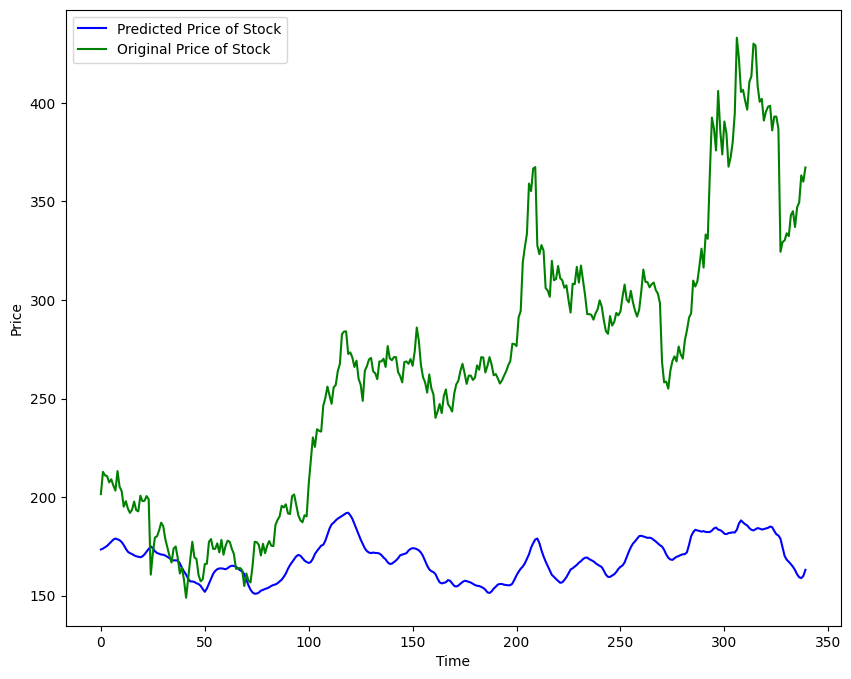

In [ ]:
past_200_days = data_train.tail(200)
data_test = pd.concat([past_200_days, data_test], ignore_index=True)

data_test_scale = scaler.transform(data_test)

x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

y_predict = model.predict(x_test)

scale_factor = 1 / scaler.scale_[0]
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'b', label='Predicted Price of Stock')
plt.plot(y_test, 'g', label='Original Price of Stock')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

model.save('Stock_Price_Prediction_Model.keras')


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load trained model
model = load_model('Stock_Price_Prediction_Model (1).keras')

# Streamlit UI
st.title('Stock Market Predictor')
stock = st.text_input('Enter Stock Symbol (e.g. AAPL, TSLA, IBM)', 'IBM')

# Get stock data
start = '2001-01-01'
end = '2024-01-01'
data = yf.download(stock, start=start, end=end)

st.subheader('Raw Stock Data')
st.write(data.tail())

# Train-test split
data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.80)])
data_test = pd.DataFrame(data['Close'][int(len(data)*0.80):])

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
past_200_days = data_train.tail(200)
final_test_data = pd.concat([past_200_days, data_test], ignore_index=True)
final_scaled_data = scaler.fit_transform(final_test_data)

# Moving averages
ma50 = data['Close'].rolling(50).mean()
ma200 = data['Close'].rolling(200).mean()
ma400 = data['Close'].rolling(400).mean()

# Moving Average Plot
st.subheader('Stock Price & Moving Averages')
fig1 = plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price', color='green')
plt.plot(ma50, label='50-day MA', color='magenta')
plt.plot(ma200, label='200-day MA', color='blue')
plt.plot(ma400, label='400-day MA', color='orange')
plt.legend()
st.pyplot(fig1)

# Prepare data for prediction
x_test = []
y_test = []
for i in range(200, final_scaled_data.shape[0]):
    x_test.append(final_scaled_data[i-200:i])
    y_test.append(final_scaled_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Prediction
predictions = model.predict(x_test)
scale_factor = 1 / scaler.scale_[0]
predictions = predictions * scale_factor
y_test = y_test * scale_factor

# Predicted vs Actual Plot
st.subheader('Predicted vs Actual Stock Price')
fig2 = plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Price', color='green')
plt.plot(predictions, label='Predicted Price', color='blue')
plt.legend()
st.pyplot(fig2)
